In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

In [388]:
data = pd.read_csv('datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [389]:
data.head(10)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12

In [390]:
data.sort_index(inplace=True)

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [392]:
#resample the data by 1hour and find the mean to aggregate the values
data = data.resample('1H').sum()

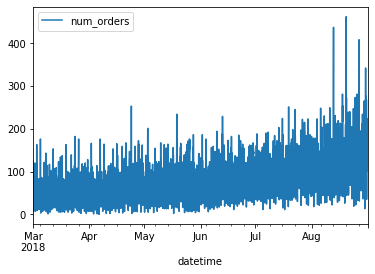

In [393]:
data.plot()

In [394]:
#data['rolling_mean'] = data.rolling(10).mean()

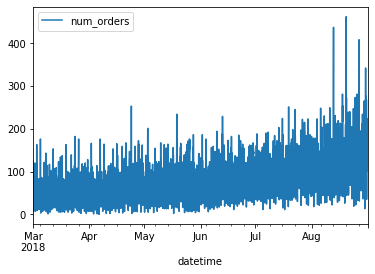

In [395]:
data.plot()

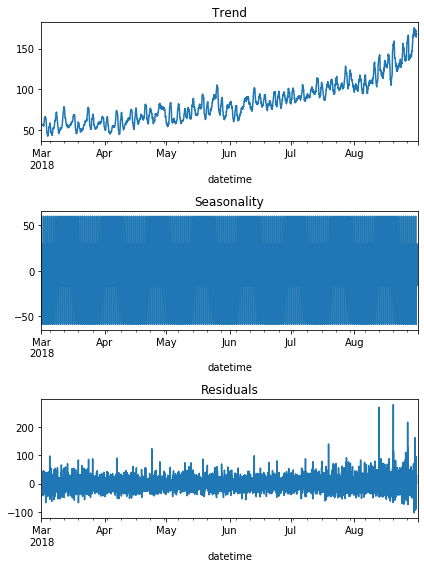

In [396]:
decomposed = seasonal_decompose(data)# < write code here >

plt.figure(figsize=(6, 8))
plt.subplot(311)
# To display the graph correctly, specify its
# axes ax equal to plt.gca() (gca = get current axis)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
# < write code here >
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
# < write code here >
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

*our series has to be made stationary.*

**Stationarity** is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). 
- If the mean of a time-series increases over time, then it’s not stationary.

In [397]:
data = data - data.shift()

- So, the stationary time series is a series where the mean and standard deviation do not change. 

In [398]:
train, test = train_test_split(data, test_size=0.25, shuffle=False)

In [399]:
train.tail()

num_orders
datetime                       
2018-07-16 19:00:00        35.0
2018-07-16 20:00:00       -33.0
2018-07-16 21:00:00        50.0
2018-07-16 22:00:00       -26.0
2018-07-16 23:00:00        17.0

In [400]:
test.head()

num_orders
datetime                       
2018-07-17 00:00:00        29.0
2018-07-17 01:00:00        -8.0
2018-07-17 02:00:00       -21.0
2018-07-17 03:00:00        -3.0
2018-07-17 04:00:00         5.0

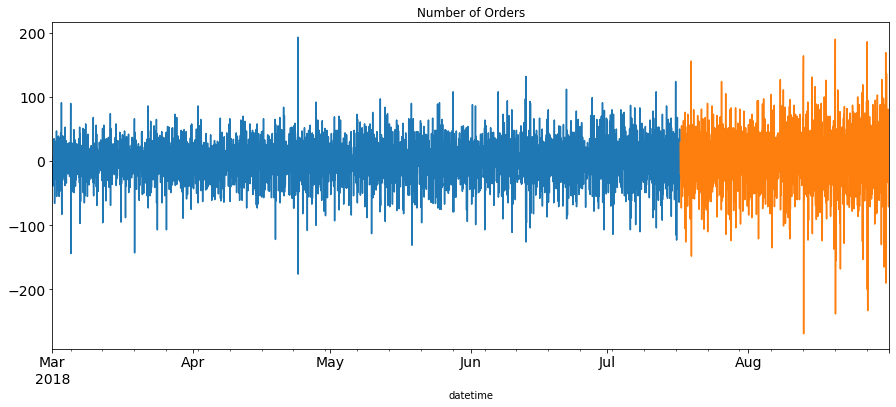

In [401]:
train.num_orders.plot(title='Number of Orders', figsize=(15, 6), fontsize=14)
test.num_orders.plot(title='Number of Orders', figsize=(15, 6), fontsize=14)
plt.show()

### Naive Approach

In [402]:
dd = np.asarray(train.num_orders)#features as an array
y_hat = test.copy()# test data

In [403]:
y_hat['naive'] = dd[len(dd)-1]

In [404]:
len(dd)-1

3311

In [405]:
#dd[3311]
train.iloc[-1]

num_orders    17.0
Name: 2018-07-16 23:00:00, dtype: float64

In [406]:
train.tail()

num_orders
datetime                       
2018-07-16 19:00:00        35.0
2018-07-16 20:00:00       -33.0
2018-07-16 21:00:00        50.0
2018-07-16 22:00:00       -26.0
2018-07-16 23:00:00        17.0

In [407]:
y_hat.tail()

num_orders  naive
datetime                              
2018-08-31 19:00:00       -71.0   17.0
2018-08-31 20:00:00        18.0   17.0
2018-08-31 21:00:00         5.0   17.0
2018-08-31 22:00:00        64.0   17.0
2018-08-31 23:00:00       -18.0   17.0

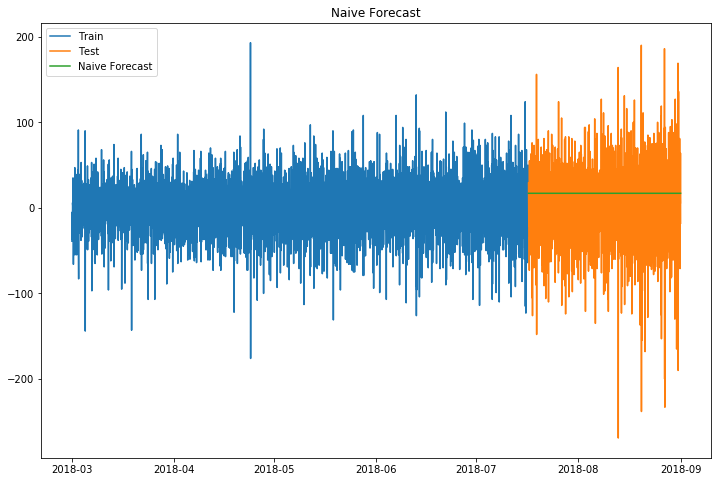

In [408]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train.index, train, label='Train')
ax.plot(test.index, test, label='Test')
ax.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
ax.legend()
ax.set_title('Naive Forecast')
plt.show()

In [409]:
naive_rmse = sqrt(mean_squared_error(test['num_orders'], y_hat['naive']))
print(naive_rmse)

54.47962822289033


### Simple Average

In [410]:
train['num_orders'].mean()

-0.006644518272425249

In [411]:
y_hat['average'] = train['num_orders'].mean()

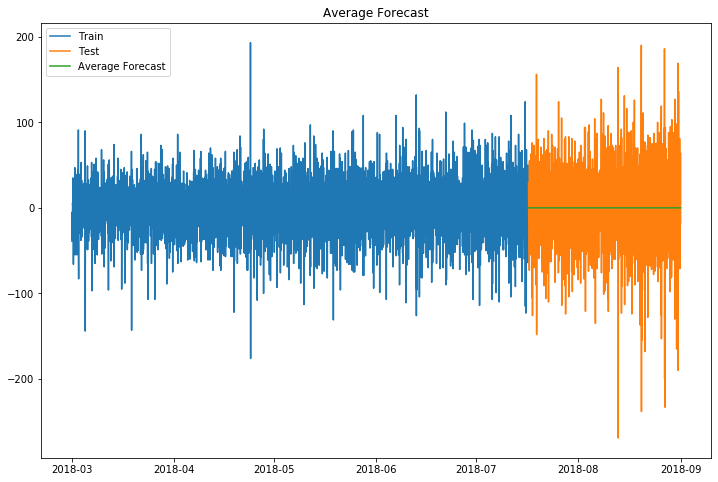

In [412]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train.index, train, label='Train')
ax.plot(test.index, test, label='Test')
ax.plot(y_hat.index, y_hat['average'], label='Average Forecast')
ax.legend(loc='best')
ax.set_title('Average Forecast')
plt.show()

In [413]:
average_rmse = sqrt(mean_squared_error(test['num_orders'], y_hat['average']))
print(average_rmse)

51.789992051861105


### Moving Average

In [414]:
y_hat['moving_average'] = train['num_orders'].rolling(100).mean().iloc[-1]

In [415]:
train['num_orders'].rolling(100).mean().iloc[-1]

0.19

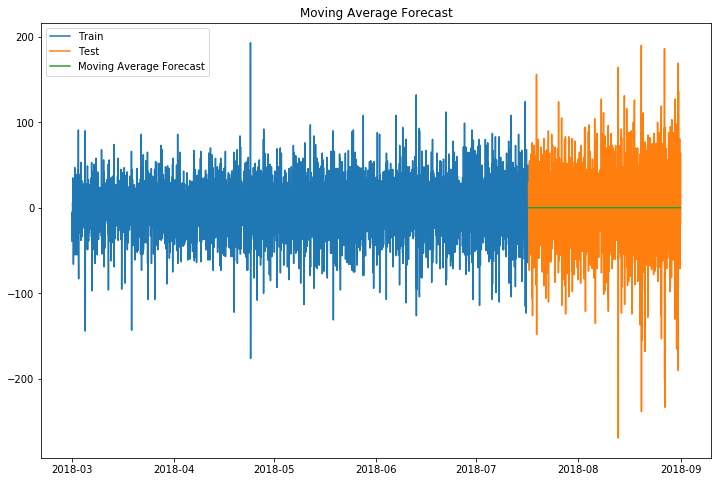

In [416]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train.index, train, label='Train')
ax.plot(test.index, test, label='Test')
ax.plot(y_hat.index, y_hat['moving_average'], label='Moving Average Forecast')
ax.legend(loc='best')
ax.set_title('Moving Average Forecast')
plt.show()

In [417]:
moving_average_rmse = sqrt(mean_squared_error(test['num_orders'], y_hat['moving_average']))
print(moving_average_rmse)

51.78998590321369


In [434]:
data = pd.read_csv('datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [435]:
data.sort_index(inplace=True)

In [436]:
#resample the data by 1hour and find the mean to aggregate the values
data = data.resample('1H').sum()

In [437]:
data = data - data.shift(1)

In [438]:
data.head()

num_orders
datetime                       
2018-03-01 00:00:00         NaN
2018-03-01 01:00:00       -39.0
2018-03-01 02:00:00       -14.0
2018-03-01 03:00:00        -5.0
2018-03-01 04:00:00       -23.0

In [439]:
def my_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [440]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


make_features(data, 6, 100)

In [441]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(3970, 8) (442, 8) (3970,) (442,)


### Linear Regression training

In [442]:
model_lr = LinearRegression()
scores = cross_validate(model_lr, features_train, target_train, scoring=my_scorer, cv=3)
print(scores['test_score'].mean())

33.676848419545266


In [443]:
model_lr.fit(features_train, target_train)
train_pred = model_lr.predict(features_train)
test_pred = model_lr.predict(features_test)

print("RMSE for the training set:", sqrt(mean_squared_error(target_train, train_pred)))
print("RMSE for the test set: ", sqrt(mean_squared_error(target_test, test_pred)))

RMSE for the training set: 33.83303258963756
RMSE for the test set:  56.37742792215439


### Decision Tree

In [444]:
for i in range(1,11):
    model_dt = DecisionTreeRegressor(random_state=0, max_depth=i)
    scores = cross_validate(model_dt, features_train, target_train, scoring=my_scorer, cv=3)
    print("Max_depth =", i, ':', scores['test_score'].mean())

Max_depth = 1 : 34.64508415050329
Max_depth = 2 : 34.00151233709203
Max_depth = 3 : 33.69546000571214
Max_depth = 4 : 33.64774107213852
Max_depth = 5 : 33.80094610456041
Max_depth = 6 : 34.65647932995248
Max_depth = 7 : 35.15669897515374
Max_depth = 8 : 36.13287969908743
Max_depth = 9 : 37.239742301016776
Max_depth = 10 : 38.457678654530184


In [445]:
model_dt = DecisionTreeRegressor(random_state=0, max_depth=5)
#print('Decision Tree training time:')
model_dt.fit(features_train, target_train)

#print('Decision Tree predicting time:')
dt_predictions = model_dt.predict(features_test)

rmse_dt = sqrt(mean_squared_error(target_test, dt_predictions))
print('Decision Tree RMSE:', rmse_dt)

Decision Tree RMSE: 58.73269166875176


### Random Forest

In [446]:
params = {'n_estimators': [70, 80, 90, 100],
          'max_depth': [10, 11, 12, 13]
         }
model_rf = RandomForestRegressor(random_state=0)

rf_search_obj = GridSearchCV(model_rf, params, scoring=my_scorer, cv=3)
rf_fit_obj =rf_search_obj.fit(features_train, target_train)

best_rf_model = rf_fit_obj.best_estimator_
print(best_rf_model)

RandomForestRegressor(max_depth=13, n_estimators=70, random_state=0)


In [447]:
#print('Random Forest training time:')
best_rf_model.fit(features_train, target_train)
#print('Random Forest predicting time:')
rf_predictions = best_rf_model.predict(features_test)

rmse_rf = sqrt(mean_squared_error(target_test, rf_predictions))
print('Random Forest RMSE:', rmse_rf)

Random Forest RMSE: 56.47129131930763


In [448]:
data.head()

num_orders  year  month  day  dayofweek  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         NaN  2018      3    1          3    NaN    NaN   
2018-03-01 01:00:00       -39.0  2018      3    1          3    NaN    NaN   
2018-03-01 02:00:00       -14.0  2018      3    1          3  -39.0    NaN   
2018-03-01 03:00:00        -5.0  2018      3    1          3  -14.0  -39.0   
2018-03-01 04:00:00       -23.0  2018      3    1          3   -5.0  -14.0   

                     lag_3  rolling_mean  
datetime                                  
2018-03-01 00:00:00    NaN           NaN  
2018-03-01 01:00:00    NaN           NaN  
2018-03-01 02:00:00    NaN           NaN  
2018-03-01 03:00:00    NaN           NaN  
2018-03-01 04:00:00  -39.0    -19.333333